In [54]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [55]:
import numpy as np
import pandas as pd

In [56]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [57]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [58]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [59]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [60]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [61]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [62]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [63]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from today

## finding the Latest Date in the data
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print(last_date)
query_date = dt.datetime.strptime(last_date,'%Y-%m-%d')- dt.timedelta(days=365)
print("Last 12 months Date: ", query_date)
#
# Perform a query to retrieve the data and precipitation scores

## Designing a query to retrieve the last 12 months of precipitation data

# #trimmed = session.query(Measurement.date, func.avg(Measurement.prcp)).\
#     filter(Measurement.date >= query_date).\
#     group_by(Measurement.date).all()
# print(trimmed)

trimmed = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= query_date).all()
    #group_by(Measurement.date).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
trimmed_pd = pd.DataFrame(trimmed)  #, columns = ['Date','Precipitation']
trimmed_pd

# Sort the dataframe by date
new_df = trimmed_pd.set_index('date')
new_df.head()


2017-08-23
Last 12 months Date:  2016-08-23 00:00:00


,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


<IPython.core.display.Javascript object>


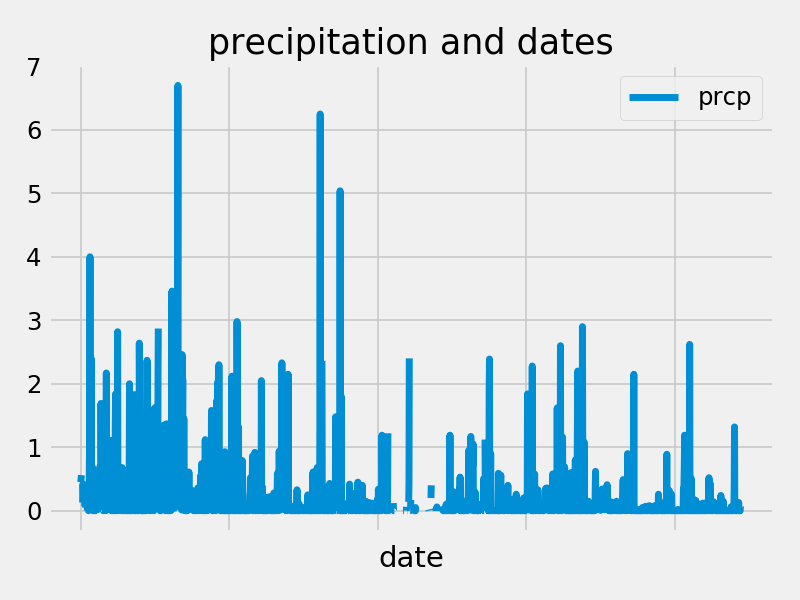

In [64]:
# Use Pandas Plotting with Matplotlib to plot the data
new_df.iloc[::-1].plot(title="precipitation and dates")
plt.tight_layout()
plt.show()


# Rotate the xticks for the dates


In [ ]:
# df = new_df.dropna(how='any')
# df.count()

In [65]:
# Use Pandas to calcualte the summary statistics for the precipitation data
new_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [66]:
# How many stations are available in this dataset?
total_stations = session.query(Station.station).count()
total_stations

9

In [67]:
# What are the most active stations?
# List the stations and the counts in descending order.

    
active_stations = session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
        
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [68]:
# Which station has the highest number of observations?

highest_observation = active_stations[0][0]
print(f'Station {highest_observation} has the highest number of observations.')

Station USC00519281 has the highest number of observations.


In [69]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
## func.min, func.max, func.avg, and func.count in your queries.

qry = session.query(func.min(Measurement.tobs).label("max_temp"), 
                func.max(Measurement.tobs).label("min_temp"),
                func.avg(Measurement.tobs).label("avg_temp")).all()

qry

[(53.0, 87.0, 73.09795396419437)]

USC00519281


<IPython.core.display.Javascript object>


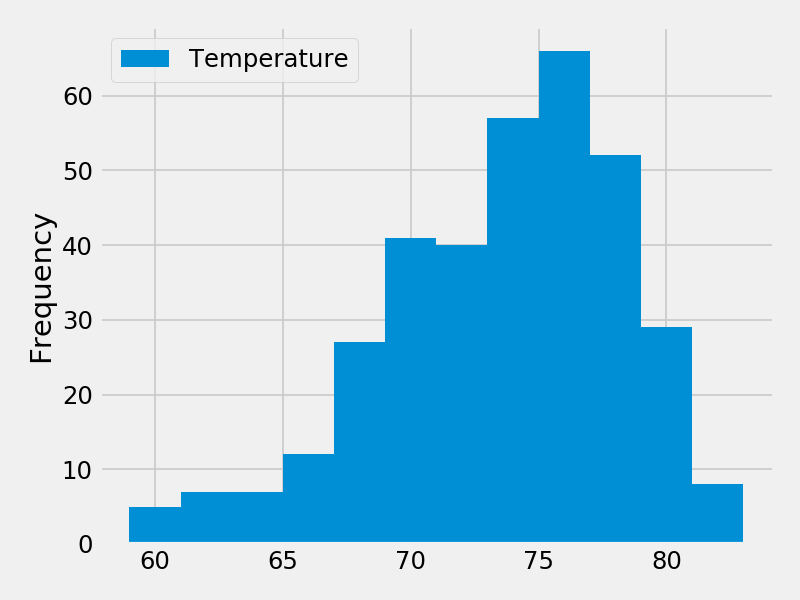

In [70]:
# Choose the station with the highest number of temperature observations.
freq_station_temp = session.query(Measurement.station,func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).first()[0]

print(freq_station_temp)
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
trimmed_temp = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == freq_station_temp).\
    filter(Measurement.date >= query_date).\
    group_by(Measurement.date).all()
#trimmed_temp

# creating a dataframe for the temperature
trimmed_temp_df = pd.DataFrame(trimmed_temp, columns = ['Date','Temperature'])
trimmed_temp_df.set_index('Date',inplace = True)

trimmed_temp_df.head()
# using pandas to plot the results as a histogram 

trimmed_temp_df.iloc[::-1].plot.hist(bins = 12)

plt.tight_layout()

plt.show()





In [71]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# put in a start and end date for vacation
vac_start = str(input('start date of vacation in (yyyy-mm-dd) '))
vac_end = str(input('end date of vacation in (yyyy-mm-dd) '))

# changing the input values to the previous year's date and changing it to %Y-%m-%d' format
start_date = dt.datetime.strptime(vac_start,'%Y-%m-%d')- dt.timedelta(days=365)
end_date = dt.datetime.strptime(vac_end,'%Y-%m-%d')- dt.timedelta(days=365)


# Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates 
#from the previous year (i.e., use "2017-01-01" if your trip start date was "2018-01-01").

# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()[0]
print(calc_temps(start_date, end_date))
#print(calc_temps('2017-02-28', '2017-03-05'))

start date of vacation in (yyyy-mm-dd) 2018-02-28
end date of vacation in (yyyy-mm-dd) 2018-03-05
(64.0, 71.96551724137932, 78.0)


In [72]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
temp_analysis = calc_temps(start_date, end_date)
# for your trip using the previous year's data for those same dates.
tmin = temp_analysis[0]

tavg = temp_analysis[1]

tmax = temp_analysis[2]
print (f'min temp:{tmin}, avg temp:{tavg}, max temp:{tmax}')
# temp_analysis

min temp:64.0, avg temp:71.96551724137932, max temp:78.0


<IPython.core.display.Javascript object>


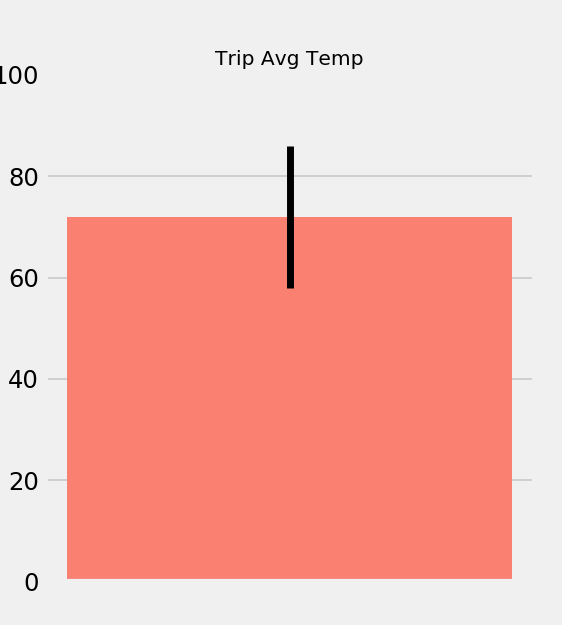

In [73]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


width = 1 # the width of the bars

fig, ax = plt.subplots(figsize=(4.5,5))
ax.bar(1, tavg, width, yerr=(tmax-tmin),
                color='Salmon')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Temp (F)",fontsize ='small')
ax.set_title("Trip Avg Temp",fontsize ='small')
plt.xticks([])
plt.ylim(0,100)

plt.show()

In [46]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

#filtering by vacation date's previous year's values
session.query(Measurement.station,Station.name,Station.latitude,Station.longitude,Station.elevation, func.sum(Measurement.prcp)).\
    group_by(Measurement.station).\
    filter(Measurement.date >= start_date ).filter(Measurement.date <= end_date ).\
    order_by(func.sum(Measurement.prcp).desc()).all()




[('USC00519281',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  42.120000000000005),
 ('USC00513117',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  38.61),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  31.409999999999986),
 ('USC00517948',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  26.820000000000014),
 ('USC00519397',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  24.660000000000004),
 ('USC00519523',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  20.880000000000003),
 ('USC00514830',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  10.080000000000002)]

## Optional Challenge Assignment